In [1]:
# 1. Importing the Necessary Modules

import numpy as np
import nltk
import networkx as nx
from collections import Counter
from itertools import combinations
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# 2. Defining the TextRank Approach

def textrank_keywork(text, top_n):
    stopwords = set(nltk_stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stopwords]

    graph = nx.Graph()
    graph.add_nodes_from(set(words))

    for w1, w2 in combinations(words, 2):
        if w1 != w2:
            graph.add_edge(w1, w2)

    plt.figure(figsize=(12, 8))
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, edge_color='gray')
    plt.title("TextRank Keyword Graph")
    plt.show()

    scores = nx.pagerank(graph)
    keywords = sorted(scores, key=scores.get, reverse=True)
    top_keywords = keywords[:top_n]
    return top_keywords

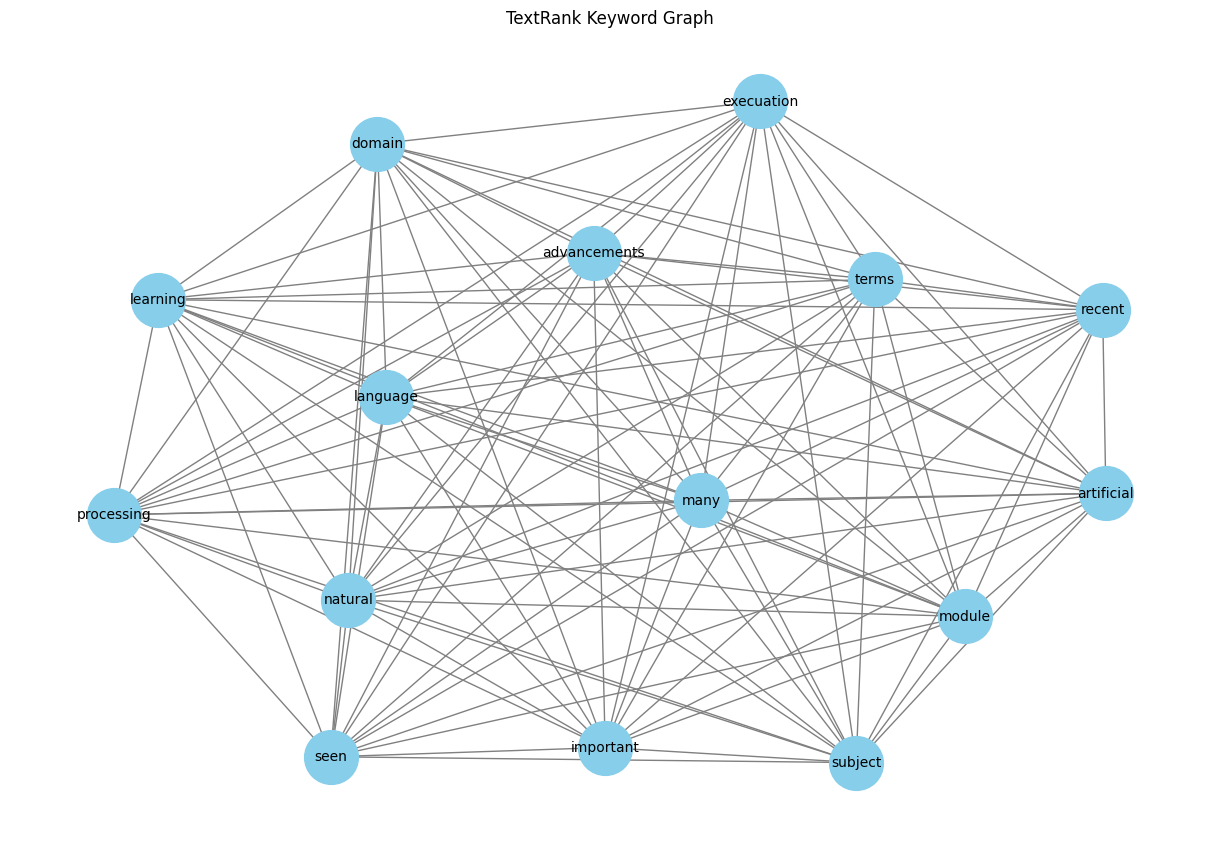

['seen',
 'recent',
 'domain',
 'learning',
 'important',
 'many',
 'advancements',
 'execuation',
 'processing',
 'subject']

In [3]:
# 3. Applyling over the Text

text = "I am learning natural language processing.Natural language processing is the important module of subject artificial intelliegence.this domain has seen many recent advancements in terms of its execuation."
top_words = textrank_keywork(text, 10)
top_words